In [34]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:

# Get the current working directory (should be something like d:\NYC_Park_Safety_Analysis\notebooks)
current_dir = os.getcwd()

# Navigate up one directory to get to NYC_Park_Safety_Analysis
project_root = os.path.dirname(current_dir)

# Now, form the path to the 'processed' directory correctly
processed_path = os.path.join(project_root, 'data', 'processed')

# Form the file path using os.path.join to ensure correct path formation
file_path = os.path.join(processed_path, 'nyc_park_crime_data_2015_to_2023.csv')

# Load the dataset
final_data = pd.read_csv(file_path)

# Convert 'YEAR' and 'QUARTER' to categorical types
final_data['YEAR'] = pd.Categorical(final_data['YEAR'])
final_data['QUARTER'] = pd.Categorical(final_data['QUARTER'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)


In [36]:
# Check for missing values
print(final_data.isnull().sum())

# Basic statistics for numerical columns
print(final_data.describe())

# Check unique values for categorical columns
print(final_data['YEAR'].unique())
print(final_data['QUARTER'].unique())
print(final_data['BOROUGH'].unique())


PARK                              2
BOROUGH                           2
SIZE (ACRES)                      0
CATEGORY                          0
MURDER                            0
RAPE                              0
ROBBERY                           0
FELONY ASSAULT                    0
BURGLARY                          0
GRAND LARCENY                     0
GRAND LARCENY OF MOTOR VEHICLE    0
TOTAL                             0
QUARTER                           0
YEAR                              0
dtype: int64
       SIZE (ACRES)          RAPE       ROBBERY  FELONY ASSAULT  \
count  41545.000000  41545.000000  41545.000000    41545.000000   
mean      24.997487      0.004646      0.074064        0.051607   
std      123.272937      0.073118      0.401264        0.367388   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.915000      0.000000      0.000000        0.000000   
50%        1.581000      0.000000      0.000000        0.000000   
75%        4.9

In [37]:
final_data.dropna(subset=['PARK', 'BOROUGH'], inplace=True)


In [38]:
# Convert 'MURDER' and 'BURGLARY' columns to numeric, setting errors='coerce' will replace non-convertible values with NaN
final_data['MURDER'] = pd.to_numeric(final_data['MURDER'], errors='coerce')
final_data['BURGLARY'] = pd.to_numeric(final_data['BURGLARY'], errors='coerce')


In [39]:
# Check for NaN values that were introduced by coercion
print(final_data[['MURDER', 'BURGLARY']].isnull().sum())

MURDER      0
BURGLARY    0
dtype: int64


##  Feature Engineering
### Add a Crime Rate per Acre Feature

In [40]:

final_data['CRIME RATE PER ACRE'] = final_data['TOTAL'] / final_data['SIZE (ACRES)']


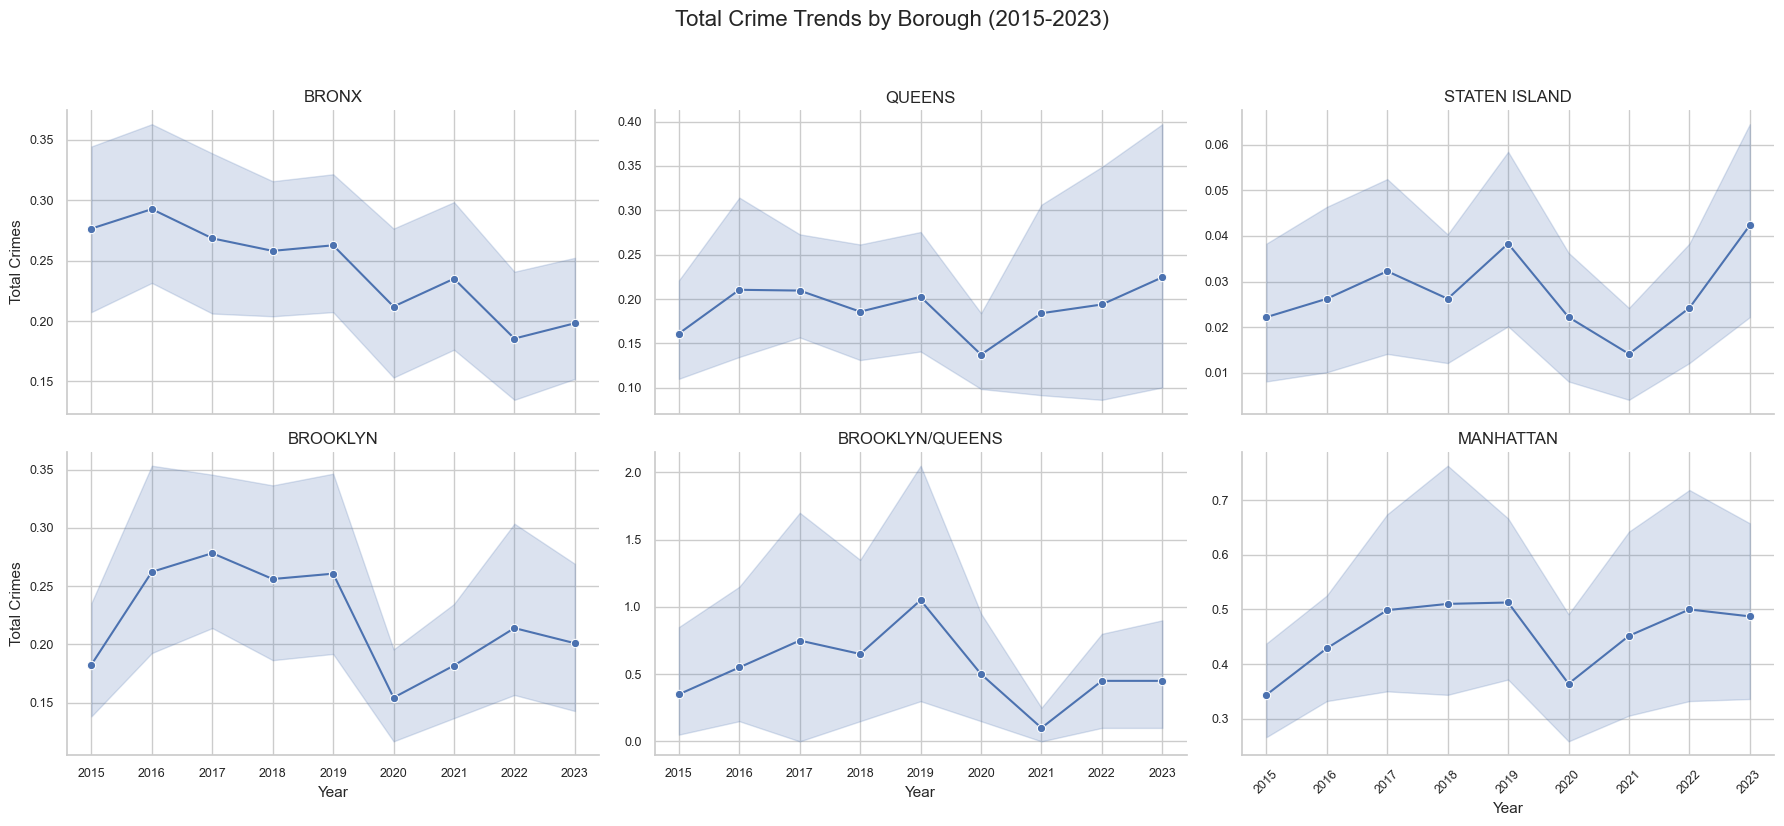

In [56]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the FacetGrid Line Plot
g = sns.FacetGrid(final_data, col='BOROUGH', col_wrap=3, height=4, sharey=False, aspect=1.5)
g.map(sns.lineplot, 'YEAR', 'TOTAL', marker='o')

# Enhance the plot
g.fig.suptitle('Total Crime Trends by Borough (2015-2023)', fontsize=16, y=1.03)
g.set_titles('{col_name}', fontsize=12)
g.set_axis_labels('Year', 'Total Crimes')

# Improve the aesthetics
g.set(xticks=final_data['YEAR'].unique())  # Set the x-ticks to be the years
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Iterate through axes to set custom formatting
for ax in g.axes.flatten():
    ax.tick_params(labelsize=9)
    ax.yaxis.get_label().set_fontsize(11)
    ax.xaxis.get_label().set_fontsize(11)

# Adjust the layout
g.tight_layout()

# Show the plot
plt.show()

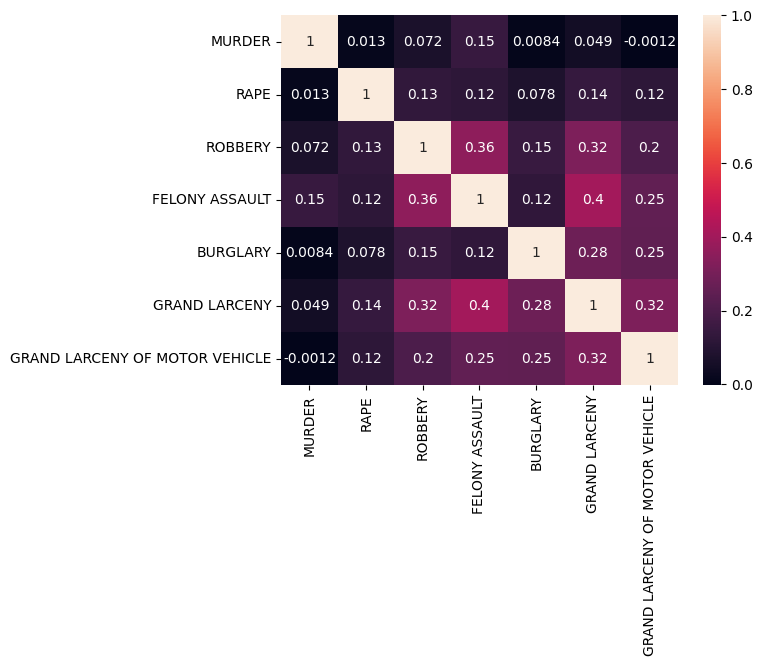

In [9]:
# 2. Correlation Matrix of Crime Types
crime_types = ['MURDER', 'RAPE', 'ROBBERY', 'FELONY ASSAULT', 'BURGLARY', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE']
corr_matrix = final_data[crime_types].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
# 4. Mean Crime Rate per Acre for Each Borough
mean_crime_rate_per_acre = final_data.groupby('BOROUGH')['Crime Rate per Acre'].mean()

print(mean_crime_rate_per_acre)

BOROUGH
BRONX              0.058767
BROOKLYN           0.056148
BROOKLYN/QUEENS    0.003235
MANHATTAN          0.090631
QUEENS             0.041874
STATEN ISLAND      0.008628
Name: Crime Rate per Acre, dtype: float64


In [15]:
# 5. Total Crimes per Quarter
total_crimes_per_quarter = final_data.groupby('QUARTER')['TOTAL'].sum()

print(total_crimes_per_quarter)

QUARTER
Q1     984.0
Q2    2699.0
Q3    4098.0
Q4    2114.0
Name: TOTAL, dtype: float64


C:\Users\gmbha\AppData\Local\Temp\ipykernel_15916\1949052938.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_crimes_per_quarter = final_data.groupby('QUARTER')['TOTAL'].sum()


## Total Crimes per Quarter Visualization

C:\Users\gmbha\AppData\Local\Temp\ipykernel_15916\4196999785.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_crimes_per_quarter.index, y=total_crimes_per_quarter.values, palette=palette)


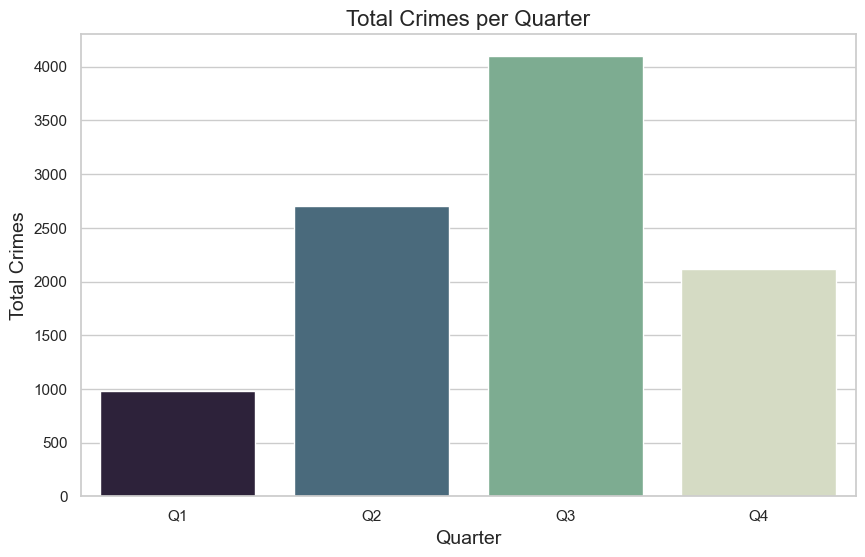

In [60]:
sns.set(style="whitegrid")

# Creating a cubehelix palette that starts light and ends dark
palette = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=False, reverse=True, n_colors=len(total_crimes_per_quarter))

# Plotting total crimes per quarter with the custom palette
plt.figure(figsize=(10, 6))
sns.barplot(x=total_crimes_per_quarter.index, y=total_crimes_per_quarter.values, palette=palette)
plt.title('Total Crimes per Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)
plt.show()

## Mean Crime Rate per Acre for Each Borough

C:\Users\gmbha\AppData\Local\Temp\ipykernel_15916\2695486873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Borough', y='Mean Crime Rate per Acre', data=mean_crime_data, palette='viridis')


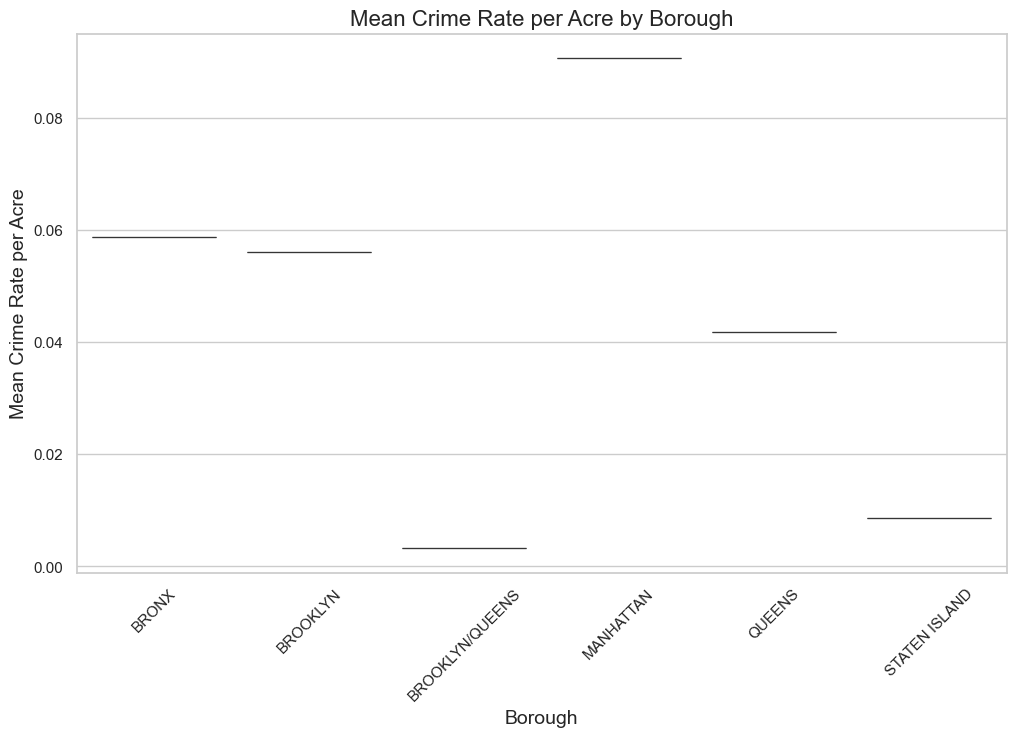

In [65]:
# Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(mean_crime_rate_per_acre.values, annot=True, cmap='coolwarm', linewidths=.5)

# Enhance the plot aesthetics and readability
plt.title('Mean Crime Rate per Acre by Borough Across Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Borough', fontsize=14)
plt.yticks(rotation=0)  # Keep the borough names horizontal for readability
plt.show()

## Crime Rate per Acre Distribution

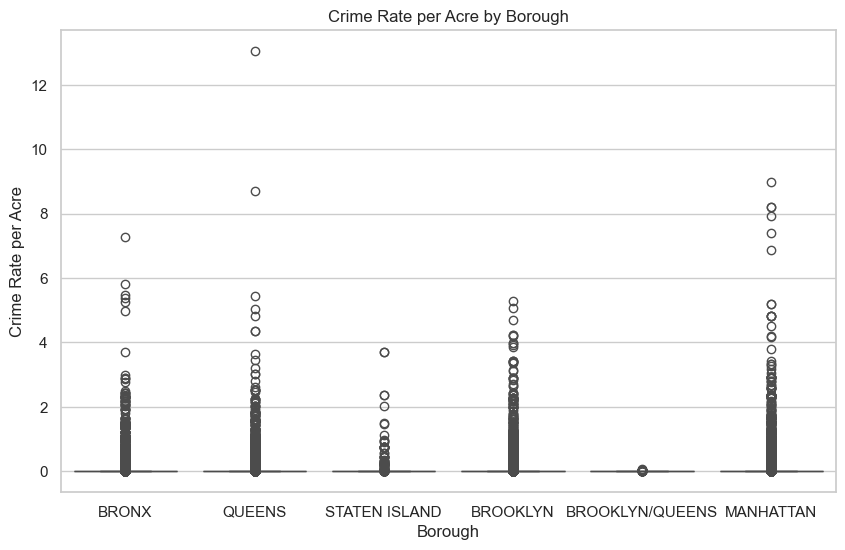

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='BOROUGH', y='CRIME RATE PER ACRE')
plt.title('Crime Rate per Acre by Borough')
plt.xlabel('Borough')
plt.ylabel('Crime Rate per Acre')
plt.show()


## Heatmap of Crimes by Year and Quarter

C:\Users\gmbha\AppData\Local\Temp\ipykernel_15916\3828872715.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  crime_heatmap_data = final_data.pivot_table(values='TOTAL', index='YEAR', columns='QUARTER', aggfunc='sum')


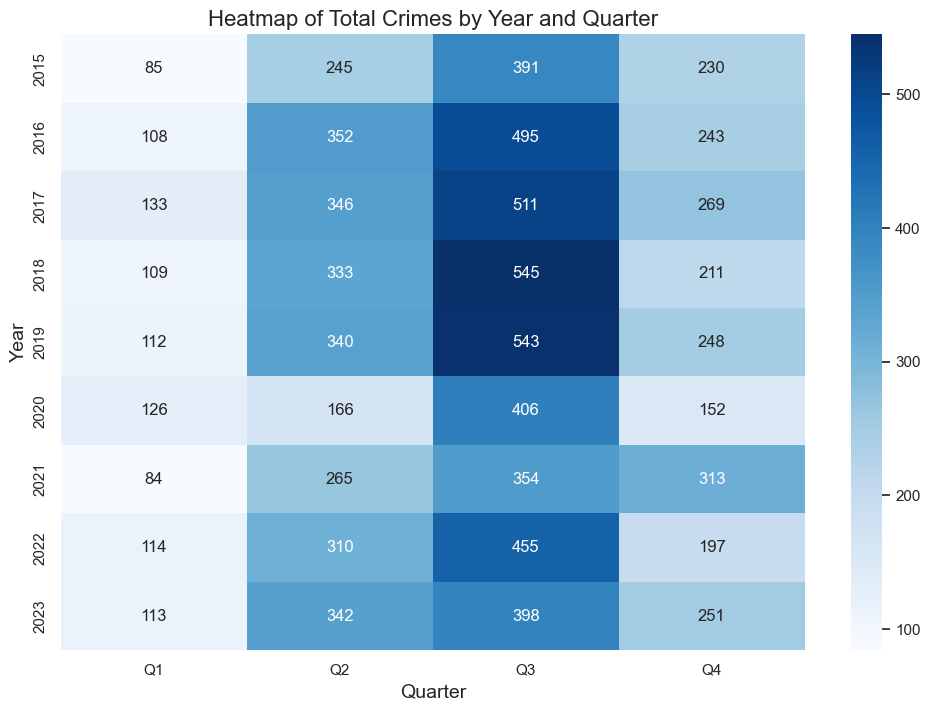

In [19]:
# Preparing data for heatmap
crime_heatmap_data = final_data.pivot_table(values='TOTAL', index='YEAR', columns='QUARTER', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of Total Crimes by Year and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.show()
